# House Pricing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/julesbellosguardo/Downloads/House Price Data/house_prices_train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.shape

(1460, 81)

In [3]:
#PoolQC Feature only has 7 non-null values so we will drop it:
df = df.drop('PoolQC', axis=1)

In [4]:
#Similar Logic for MiscFeature:
df = df.drop('MiscFeature', axis=1)

In [5]:
#Dropping the ID column since we don't need it for model training:

df = df.drop('Id', axis = 1)

## EDA:

<Axes: xlabel='SalePrice', ylabel='Count'>

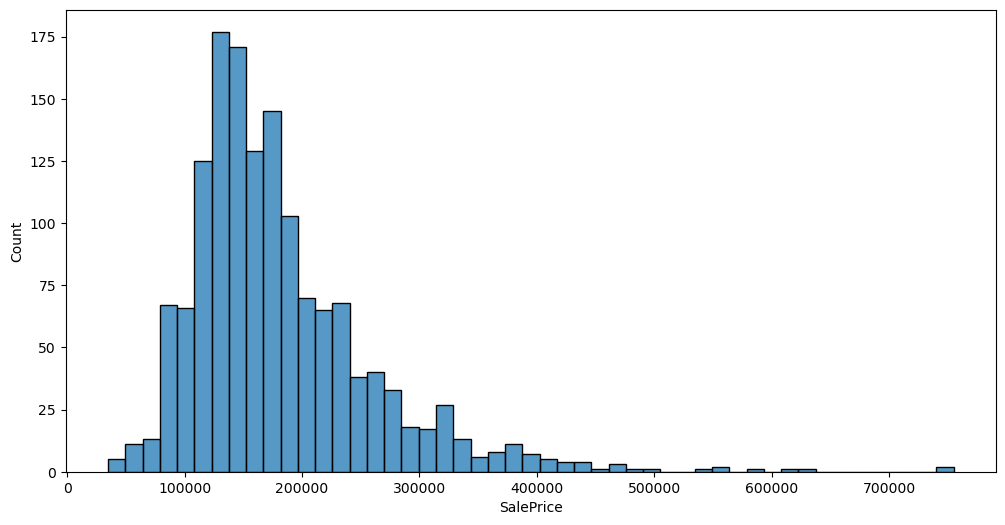

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(data = df, x = 'SalePrice')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
#Getting an idea of which variables correlate highly to Sale price:
df.corr(numeric_only=True)['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

<Axes: >

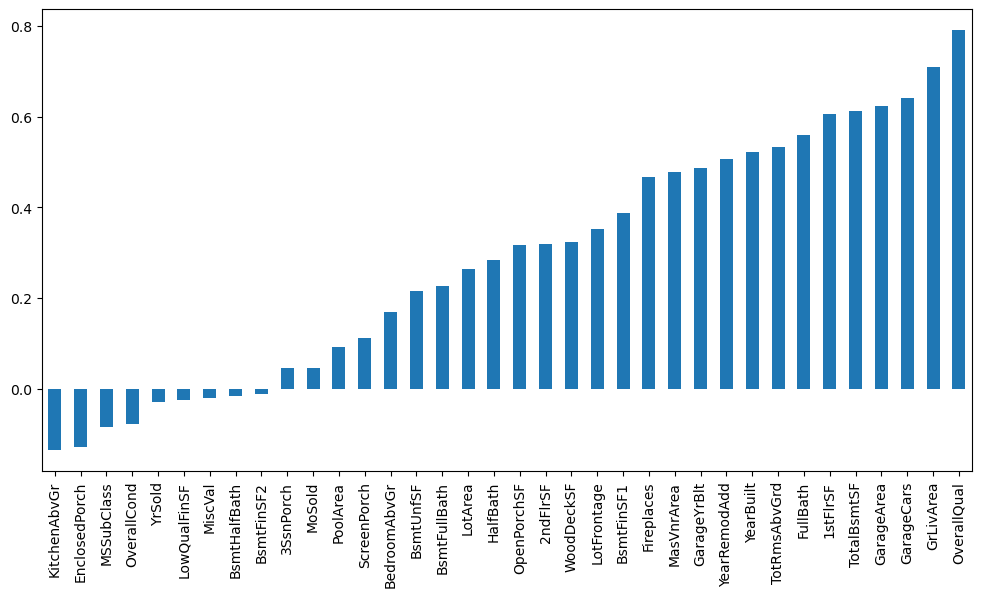

In [7]:
plt.figure(figsize=(12,6))
df.corr(numeric_only=True)['SalePrice'].sort_values()[:-1].plot(kind = 'bar') #Excluding Target column:

In [18]:
df.OverallQual.describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

Text(0, 0.5, 'Mean Price')

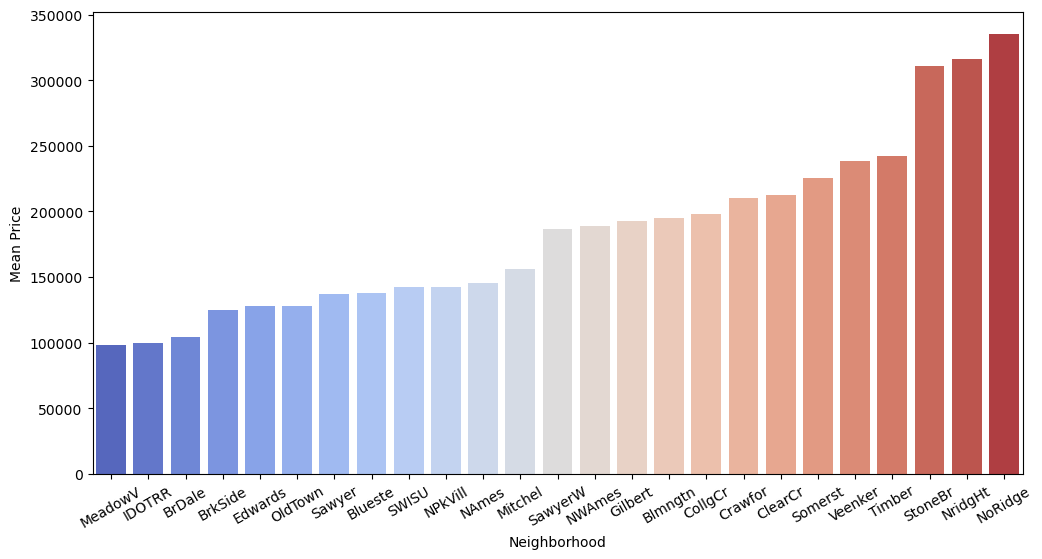

In [8]:
mean_nbhd_prices = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
plt.figure(figsize=(12,6))
sns.barplot(y = mean_nbhd_prices.values, x = mean_nbhd_prices.index, hue = mean_nbhd_prices.index, palette = 'coolwarm')
plt.tick_params(axis='x', labelrotation=30)
plt.ylabel('Mean Price')

<Axes: ylabel='SalePrice'>

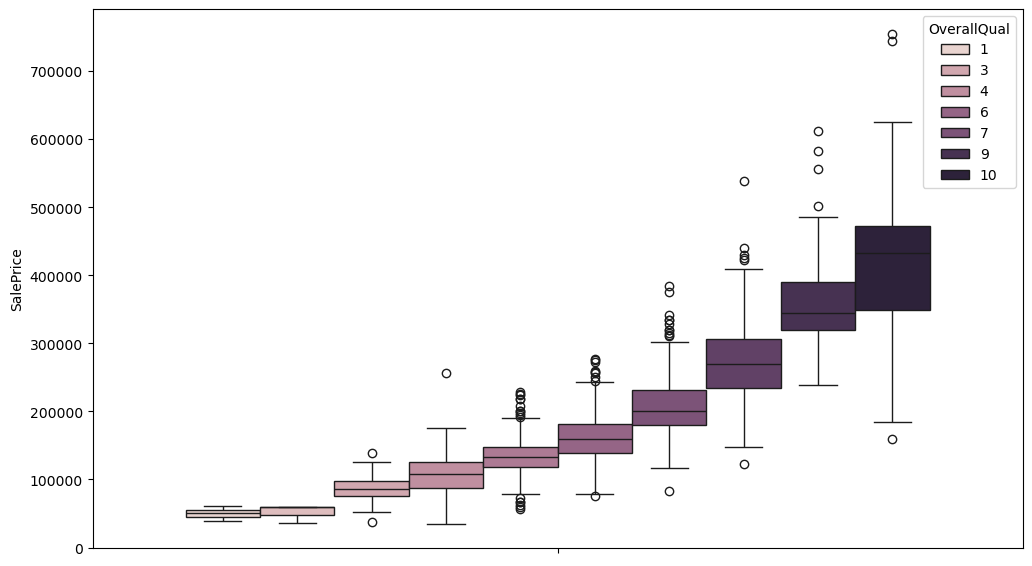

In [7]:
plt.figure(figsize=(12,7))
sns.boxplot(data = df, hue = 'OverallQual', y = 'SalePrice', )

In [9]:
pd.set_option('display.max_columns', 1000)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


#### Before dealing with the rest of the missing values, we will fit the data to a Random Forest Regressor as it can effectively handle missing data. Hyper-parameter tuning will follow. Following this, the rest of the missing data will be dealt with and the data will be prepared to be fed into an artificial neural network and results of both models will be compared

In [6]:
import tensorflow_decision_forests as tfdf

2024-08-26 00:14:13.067849: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Splitting Data into train and test sets:

In [38]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
type(y_train)

pandas.core.series.Series

In [11]:
train_dataframe = pd.concat([X_train, y_train], axis = 1)
test_dataframe = pd.concat([X_test, y_test], axis = 1)

In [12]:
#Converting pandas Dataframes to Tensorflow Datasets:
label = 'SalePrice'
tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_dataframe, label= label, task=tfdf.keras.Task.REGRESSION)
tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_dataframe, label= label, task=tfdf.keras.Task.REGRESSION)

In [13]:
#Seeing available models to us in TFDF:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [14]:
#We will use a Random Forest:

#Initialization of RF
rand_forest = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION) 
rand_forest.compile(metrics = ['mse']) #Want to keep track of MSE

Use /var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/tmp0qnqmqc0 as temporary training directory


#####  Model Training using default hyperparameters:

In [15]:
rand_forest.fit(x = tf_train_dataset) #no need to pass in y as tensorflow data set has label already

Reading training dataset...
Training dataset read in 0:00:06.823731. Found 1022 examples.
Training model...


[INFO 24-08-26 00:14:30.3045 EDT kernel.cc:1233] Loading model from path /var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/tmp0qnqmqc0/model/ with prefix e009e3bb0ba34952


Model trained in 0:00:02.245912
Compiling model...


[INFO 24-08-26 00:14:30.6524 EDT decision_forest.cc:734] Model loaded with 300 root(s), 97174 node(s), and 74 input feature(s).
[INFO 24-08-26 00:14:30.6530 EDT abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-08-26 00:14:30.6531 EDT kernel.cc:1061] Use fast generic engine


Model compiled.


In [16]:
#Plotting the model training log and evaluation on Out of Bag data:
#First, lets look at the training logs themselve using Tensorflow's inspector:

rand_forest.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=379, accuracy=None, loss=None, rmse=43312.218070768366, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=1012, accuracy=None, loss=None, rmse=33925.69311115456, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=1022, accuracy=None, loss=None, rmse=32128.12270732799, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=1022, accuracy=None, loss=None, rmse=30837.09031890364, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=1022, accuracy=None, loss=None, rmse=30289.25924177624, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=1022, accuracy=None, loss=None, rmse=30128.813263445685, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=61, evaluation

Text(0, 0.5, 'RMSE')

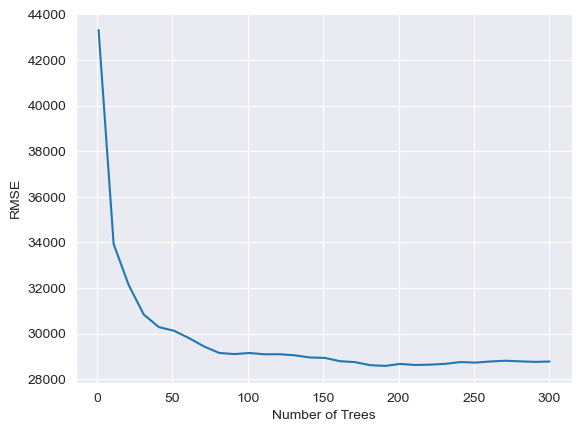

In [21]:
#Plotting the model training log and evaluation on Out-of-Bag data:

logs = rand_forest.make_inspector().training_logs() 
sns.set_style('darkgrid')
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])

plt.xlabel('Number of Trees')
plt.ylabel('RMSE')

In [18]:
#Evaluating on test data:
evaluation = rand_forest.evaluate(x = tf_test_dataset, return_dict=True)

for name, value in evaluation.items():
    print(f'{name}: {value:.4f}')


1/1 [==============================] - 9s 9s/step - loss: 0.0000e+00 - mse: 864491904.0000
loss: 0.0000
mse: 864491904.0000


In [19]:

print(f'RMSE: {np.sqrt(864491904.0000)}')

RMSE: 29402.24317973035


In [20]:
#Taking a look at variable importances in the decision forest:
rand_forest.make_inspector().variable_importances()

{'INV_MEAN_MIN_DEPTH': [("OverallQual" (1; #61), 0.24511464647613657),
  ("Neighborhood" (4; #58), 0.23136530721493886),
  ("GrLivArea" (1; #38), 0.1883775999509334),
  ("GarageCars" (1; #32), 0.14355890142326266),
  ("TotalBsmtSF" (1; #71), 0.13213092889879666),
  ("1stFlrSF" (1; #0), 0.13136875322318844),
  ("GarageArea" (1; #31), 0.1232876773991421),
  ("ExterQual" (4; #22), 0.11706653972924443),
  ("BsmtFinSF1" (1; #8), 0.11431178721371962),
  ("YearBuilt" (1; #74), 0.11141797073272885),
  ("2ndFlrSF" (1; #1), 0.11035159354854542),
  ("BsmtQual" (4; #14), 0.10946069513727205),
  ("LotArea" (1; #47), 0.10941780423519877),
  ("FullBath" (1; #29), 0.1085608124439371),
  ("YearRemodAdd" (1; #75), 0.10779422771302809),
  ("Exterior2nd" (4; #24), 0.10563584705964442),
  ("Exterior1st" (4; #23), 0.10550521521494895),
  ("KitchenQual" (4; #44), 0.1053699537587335),
  ("GarageFinish" (4; #34), 0.10501186234013497),
  ("Fireplaces" (1; #27), 0.10488343729752786),
  ("OverallCond" (1; #60), 0

### Tuning Hyperparameters (Random search):

In [22]:
#Default model hyperparameters:
print('Default Hyper-parameters: \n', rand_forest.learner_params.keys())

Default Hyper-parameters: 
 dict_keys(['adapt_bootstrap_size_ratio_for_maximum_training_duration', 'allow_na_conditions', 'bootstrap_size_ratio', 'bootstrap_training_dataset', 'categorical_algorithm', 'categorical_set_split_greedy_sampling', 'categorical_set_split_max_num_items', 'categorical_set_split_min_item_frequency', 'compute_oob_performances', 'compute_oob_variable_importances', 'growing_strategy', 'honest', 'honest_fixed_separation', 'honest_ratio_leaf_examples', 'in_split_min_examples_check', 'keep_non_leaf_label_distribution', 'max_depth', 'max_num_nodes', 'maximum_model_size_in_memory_in_bytes', 'maximum_training_duration_seconds', 'min_examples', 'missing_value_policy', 'num_candidate_attributes', 'num_candidate_attributes_ratio', 'num_oob_variable_importances_permutations', 'num_trees', 'pure_serving_model', 'random_seed', 'sampling_with_replacement', 'sorting_strategy', 'sparse_oblique_max_num_projections', 'sparse_oblique_normalization', 'sparse_oblique_num_projections_e

In [23]:
#Configuring the tuner and creating a random search tuner with 50 trials:
tfdf_tuner = tfdf.tuner.RandomSearch(num_trials=50)

tfdf_tuner.choice('min_examples', [2,5,7,10])
tfdf_tuner.choice('categorical_algorithm', ['CART', 'RANDOM'])

#Pairing search for optimal max depth with a local growing strategy
local_search_space = tfdf_tuner.choice('growing_strategy', ['LOCAL'])
local_search_space.choice('max_depth', [3,4,5,6,8])

#optimizing max_num_nodes for a growing strategy of best_first_global:
global_search_space = tfdf_tuner.choice('growing_strategy', ['BEST_FIRST_GLOBAL'], merge=True)
global_search_space.choice('max_num_nodes', [16,32,64,128,256])

tfdf_tuner.choice('num_candidate_attributes_ratio', [0.2, 0.5, 0.9, 1.0])


In [24]:
#Tuning the Model:

tuned_rand_forest = tfdf.keras.RandomForestModel(tuner = tfdf_tuner, task = tfdf.keras.Task.REGRESSION)
tuned_rand_forest.compile(metrics = ['mse'])
tuned_rand_forest.fit(tf_train_dataset, verbose=1)

Use /var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/tmpb903knyl as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.347503. Found 1022 examples.
Training model...


[INFO 24-08-26 00:17:55.0823 EDT kernel.cc:1233] Loading model from path /var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/tmpb903knyl/model/ with prefix 77464cd04d6b4333
[INFO 24-08-26 00:17:55.2619 EDT decision_forest.cc:734] Model loaded with 300 root(s), 76500 node(s), and 74 input feature(s).
[INFO 24-08-26 00:17:55.2620 EDT abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-08-26 00:17:55.2620 EDT kernel.cc:1061] Use fast generic engine


Model trained in 0:02:31.282056
Compiling model...
Model compiled.


In [25]:
#Evaluating the tuned model:
tuned_evaluation = tuned_rand_forest.evaluate(x = tf_test_dataset, return_dict=True)

for name, value in tuned_evaluation.items():
    print(f'{name}: {value:.4f}')

1/1 [==============================] - 1s 796ms/step - loss: 0.0000e+00 - mse: 855003456.0000
loss: 0.0000
mse: 855003456.0000


In [33]:
print(f'Tuned RMSE: {np.sqrt(810908480.0000)}')

Tuned RMSE: 28476.454835530352


#### Hyper-parameter tuning didn't lead to much better results compared to the default parameters

In [26]:
#Looking at tuning logs:

tune_logs = tuned_rand_forest.make_inspector().tuning_logs()
tune_logs.head()

,score,evaluation_time,best,min_examples,categorical_algorithm,growing_strategy,max_num_nodes,num_candidate_attributes_ratio,max_depth
0,-31016.412109,3.061140,False,2,RANDOM,BEST_FIRST_GLOBAL,32.0,0.5,NaN
1,-30551.425781,7.456173,False,7,CART,BEST_FIRST_GLOBAL,256.0,1.0,NaN
2,-31824.056641,10.125633,False,7,RANDOM,LOCAL,NaN,0.5,6.0
3,-29849.250000,16.943816,False,2,CART,BEST_FIRST_GLOBAL,256.0,0.9,NaN
4,-30973.064453,18.276384,False,10,CART,LOCAL,NaN,0.5,6.0


In [27]:
#Optimal hyper-parameter results from tuner:
tune_logs[tune_logs['best'] == True].iloc[0]

score                                 -29091.101562
evaluation_time                          125.467133
best                                           True
min_examples                                      5
categorical_algorithm                          CART
growing_strategy                  BEST_FIRST_GLOBAL
max_num_nodes                                 128.0
num_candidate_attributes_ratio                  0.5
max_depth                                       NaN
Name: 36, dtype: object

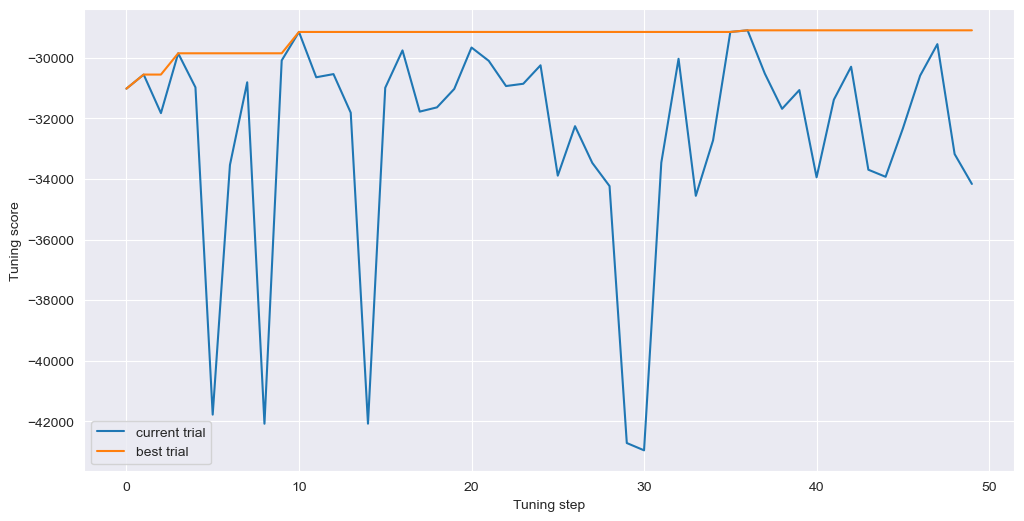

In [28]:
#Plotting evaluation of best score during tuning:
plt.figure(figsize=(12,6))
plt.plot(tune_logs['score'], label = 'current trial')
plt.plot(tune_logs['score'].cummax(), label = 'best trial')
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()

#### Training model again using predefined hyper-parameters:

In [29]:
#Creating a random search tuner:

random_search_tuner = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

In [30]:
#Initializing and training model:

rand_search_tuned_model = tfdf.keras.RandomForestModel(tuner = random_search_tuner, task = tfdf.keras.Task.REGRESSION)
rand_search_tuned_model.fit(tf_train_dataset, verbose=1)

Use /var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/tmpfjeor2yd as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.904057. Found 1022 examples.
Training model...
Model trained in 9:09:15.593674
Compiling model...


[INFO 24-08-26 09:27:14.0890 EDT kernel.cc:1233] Loading model from path /var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/tmpfjeor2yd/model/ with prefix 32b994fb8ecb4f8d
[INFO 24-08-26 09:27:14.2060 EDT decision_forest.cc:734] Model loaded with 300 root(s), 47662 node(s), and 66 input feature(s).
[INFO 24-08-26 09:27:14.2061 EDT abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-08-26 09:27:14.2061 EDT kernel.cc:1061] Use fast generic engine


Model compiled.


In [31]:
#Evaluating the tuned model:

tuned_randsearch_evaluation = tuned_rand_forest.evaluate(x = tf_test_dataset, return_dict=True)

for name, value in tuned_randsearch_evaluation.items():
    print(f'{name}: {value:.4f}')

1/1 [==============================] - 1s 783ms/step - loss: 0.0000e+00 - mse: 855003456.0000
loss: 0.0000
mse: 855003456.0000


In [35]:
print(f'Tuned RMSE: {round(np.sqrt(855003456.0000), 3)}')

Tuned RMSE: 29240.442


Again, results are not any better with tuning, the best method for better results would be to collect more data. Let's now see if a more complex model can more accurately predict house prices:

# Preparing data for an Artificial Neural Network:

#### Dealing with features having missing values:

In [6]:
pd.set_option('display.max_columns', 100)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [7]:
pd.set_option('display.max_rows', 100)
missing_values = df.isnull().sum()
missing_values[missing_values != 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [36]:
#Starting with Alley:
df.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

<Axes: xlabel='Alley', ylabel='count'>

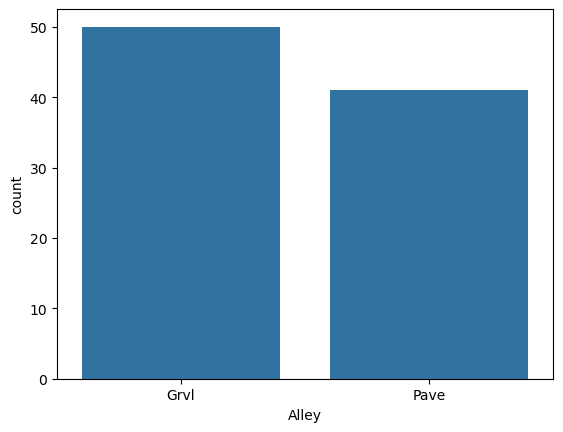

In [35]:
sns.countplot(data = df, x = 'Alley')

In [15]:
df.groupby('Alley')['SalePrice'].mean()

Alley
Grvl    122219.080000
Pave    168000.585366
Name: SalePrice, dtype: float64

<Axes: xlabel='Alley', ylabel='SalePrice'>

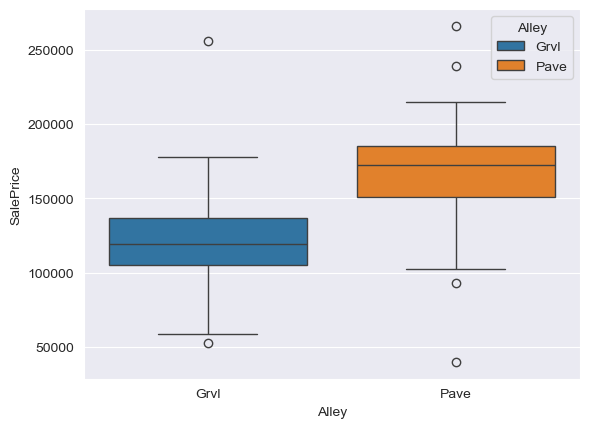

In [43]:
#Checking out difference in Sale Price distribution with different Alley types:
sns.boxplot(data = df, x = 'Alley', y = 'SalePrice', hue = 'Alley')

In [40]:
#The distiburions are similar with means that aren't very far apart, though one must keep in mind there are little houses with fences
#We will convert to a binary variable of whether or not a house has a fence:

df['Alley_binary'] = df.Alley.apply(lambda x: 1 if (x == 'Grvl' or x == 'Pave') else 0)

In [41]:
df = df.drop('Alley', axis=1)

In [21]:
#Seeing other features with missing values
missing_values = df.isnull().sum()
missing_values[missing_values != 0]

LotFrontage      259
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [48]:
#MasVnrType:

df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

<Axes: xlabel='MasVnrType', ylabel='count'>

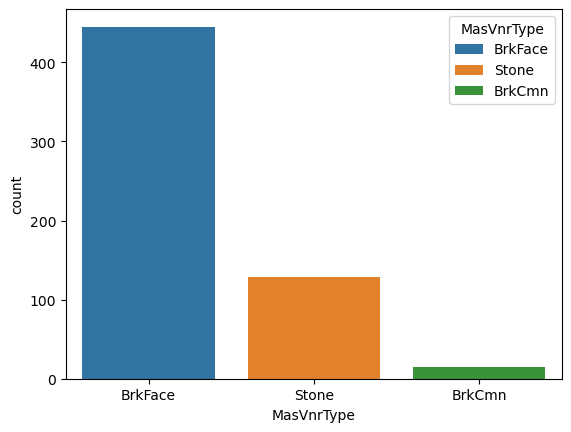

In [8]:
sns.countplot(data = df, x = 'MasVnrType', hue = 'MasVnrType')

<Axes: xlabel='MasVnrType', ylabel='SalePrice'>

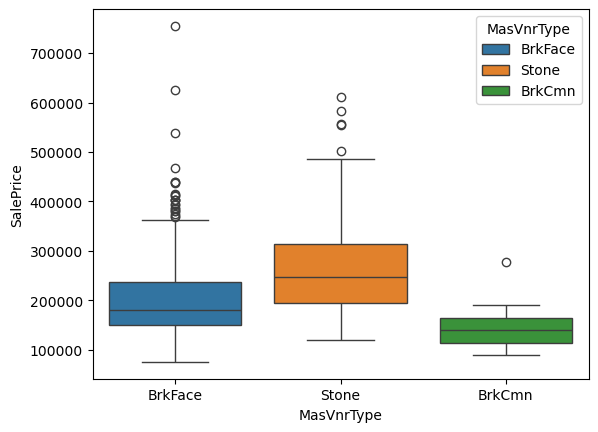

In [5]:
sns.boxplot(data=df, x = 'MasVnrType', y = 'SalePrice', hue = 'MasVnrType')

In [42]:
#Since over half of the MasVnrType values are missing, and Saleprice doesn't change too much with
# different MasVnrTypes we will drop the column:

df = df.drop('MasVnrType', axis=1)

In [43]:
#Now for Fence column:

df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

<Axes: xlabel='Fence', ylabel='SalePrice'>

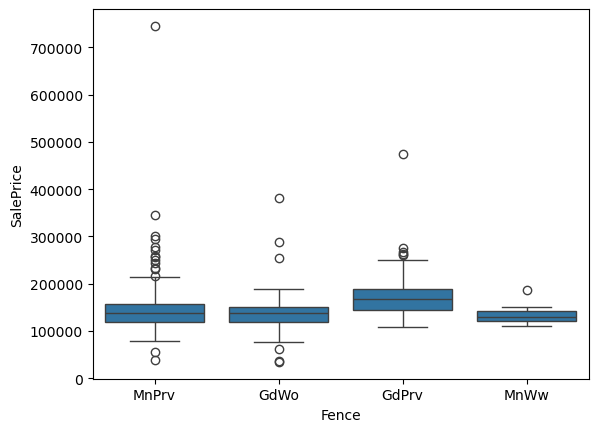

In [10]:
sns.boxplot(data = df, x = 'Fence', y = 'SalePrice')

In [9]:
df.groupby('Fence')['SalePrice'].mean().sort_values()

Fence
MnWw     134286.363636
GdWo     140379.314815
MnPrv    148751.089172
GdPrv    178927.457627
Name: SalePrice, dtype: float64

In [44]:
#Since the sale price of homes with different fence types are within a reasonable range (Doesn't vary greatly), 
#we will convert the Fence column to a binary feature of whether the home has a fence or not:

df['Fence_binary'] = df.Fence.apply(lambda x: 1 if x in ['MnPrv', 'GdWo', 'GdPrv', 'MnWw'] else 0)

In [45]:
df = df.drop('Fence', axis=1)

<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

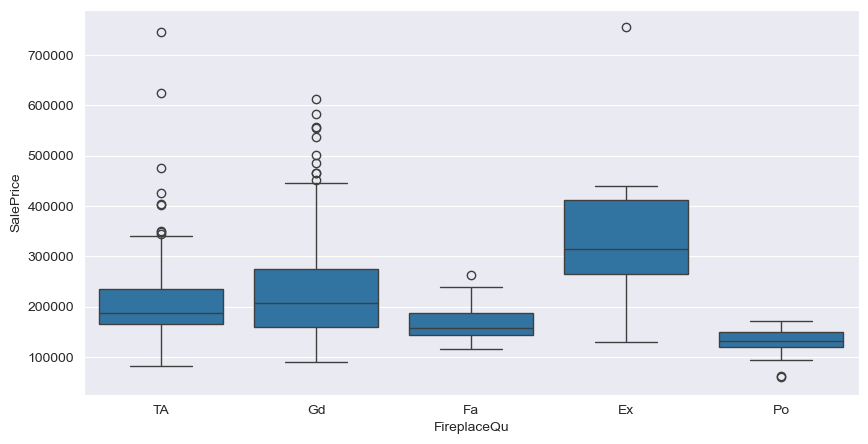

In [74]:
#FireplaceQu:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'FireplaceQu', y = 'SalePrice')

#### A fireplace in Excellent condition seems to elevate the home's Sale Price when compared to the others
we will fill in missing values with a string value of 'no_fireplace and later convert the column values to dummy variables. One thing to watch out for is the outliers in other categories such as Gd and TA which may affect the model

In [46]:
df['FireplaceQu'] = df.FireplaceQu.fillna('no_frplce')

<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

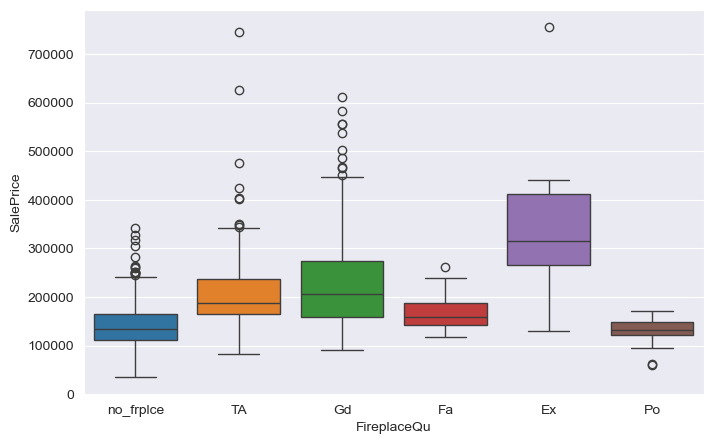

In [26]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x = 'FireplaceQu', hue = 'FireplaceQu', y = 'SalePrice')

In [24]:
missing_values = df.isnull().sum()
missing_values[missing_values != 0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

##### Since the MasVnrArea and Electrical column have a negligible amount of missing values *8 and 1 respectively), we will simply drop them:


In [47]:
df = df.dropna(subset = ['MasVnrArea', 'Electrical'])

In [28]:
df.shape

(1451, 77)

In [27]:
missing_values = df.isnull().sum()
missing_values[missing_values != 0]

LotFrontage     257
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [120]:
df.LotFrontage.describe()

count    1194.000000
mean       70.027638
std        24.299302
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

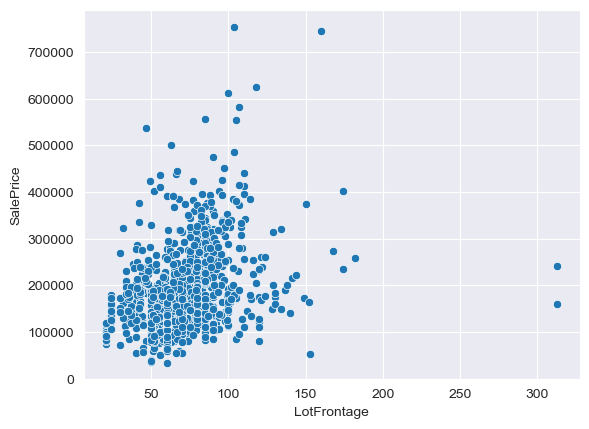

In [123]:
sns.scatterplot(data = df, x = 'LotFrontage', y = 'SalePrice')

In [130]:
df.corr(numeric_only=True)['SalePrice']['LotFrontage']

0.3503002510419742

In [48]:
#Since correlation with sale price is low and around 25% of column values are missing (and we don't have a lot of data), 
#we will drop this column:

df = df.drop('LotFrontage', axis=1)

In [35]:
missing_values = df.isnull().sum()
missing_values[missing_values != 0]

BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

<Axes: xlabel='BsmtExposure', ylabel='SalePrice'>

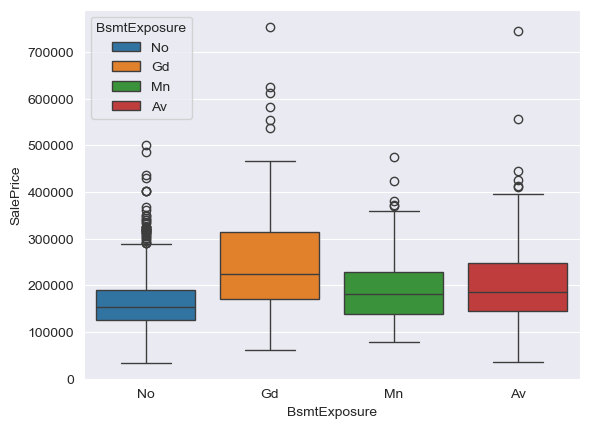

In [39]:
sns.boxplot(data = df, x = 'BsmtExposure', y = 'SalePrice', hue = 'BsmtExposure')

In [30]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [49]:
#Technically no missing values, some homes just don't have a basement. We will simply replace nans with a string value:

df['BsmtQual'] = df.BsmtQual.fillna('no_bsmt')

#### Same logic follows for the rest of the basement variables, and though it will be checked, I assume it does for all the garage variables as well

In [50]:
#Filling in the rest of the Bsmt missing values with 'no_bsmt':
df['BsmtCond'] = df.BsmtCond.fillna('no_bsmt')
df['BsmtExposure'] = df.BsmtExposure.fillna('no_bsmt')
df['BsmtFinType1'] = df.BsmtFinType1.fillna('no_bsmt')
df['BsmtFinType2'] = df.BsmtFinType2.fillna('no_bsmt')

In [41]:
missing_values = df.isnull().sum()
missing_values[missing_values != 0]

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [51]:
#Looking at the garage variables (besides Year Built), all of these with missing values just mean the home has no garage. 
#Same technique will be used as with the basement variables:

df['GarageType'] = df.GarageType.fillna('no_garage')
df['GarageFinish'] = df.GarageFinish.fillna('no_garage')
df['GarageQual'] = df.GarageQual.fillna('no_garage')
df['GarageCond'] = df.GarageCond.fillna('no_garage')

<Figure size 1000x400 with 0 Axes>

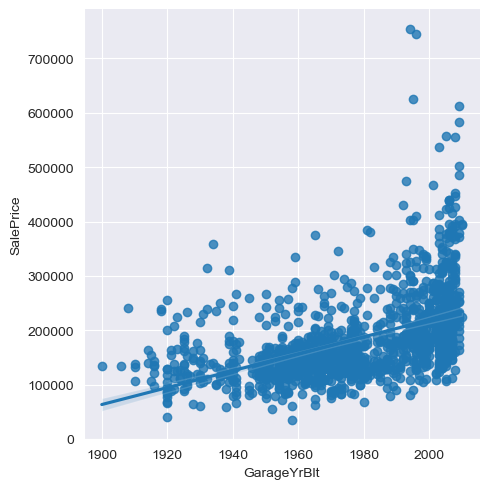

In [33]:
plt.figure(figsize=(10,4))
sns.lmplot(data = df, x = 'GarageYrBlt', y = 'SalePrice')

In [51]:
df.corr(numeric_only=True)['SalePrice']['GarageYrBlt']

0.4866575059908651

##### For Garage Year Built, replacing missing values with 0 and keeping the rest could make sense since the data will be scaled. Can't replace with something like average year built by neighborhood since it wouldn't make sense

In [52]:
df['GarageYrBlt'] = df.GarageYrBlt.fillna(0)

## Dealing with categorical data and creation of dummy variables:

In [103]:
#Displaying all Categorical Columns:
df.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [53]:
#MSSubClass is numerical but represents categories, so we will convert them to their string values

MSSubClass_mapping = {20: '1-STORY 1946 & NEWER ALL STYLES', 30:  '1-STORY 1945 & OLDER', 40: '1-STORY W/FINISHED ATTIC ALL AGES',
                     45: '1-1/2 STORY - UNFINISHED ALL AGES', 50: '1-1/2 STORY FINISHED ALL AGES',  60: '2-STORY 1946 & NEWER',
                     70: '2-STORY 1945 & OLDER', 75: '2-1/2 STORY ALL AGES', 80: 'SPLIT OR MULTI-LEVEL', 85: 'SPLIT FOYER',
                     90:  'DUPLEX - ALL STYLES AND AGES', 120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                     150: '1-1/2 STORY PUD - ALL AGES',  160: '2-STORY PUD - 1946 & NEWER', 180:  'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                     190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'}

df.MSSubClass = df.MSSubClass.map(MSSubClass_mapping)

In [54]:
#Converting to a dummy variable:
MSSubClass_dummies = pd.get_dummies(data = df['MSSubClass'], drop_first=True, dtype='float64')
df = pd.concat([df.drop('MSSubClass', axis=1), MSSubClass_dummies], axis=1)

In [69]:
#Displaying all Categorical Columns:
df.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
# Converting the rest of the categories to Indicator variables:
dummies = pd.get_dummies(df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']], drop_first=True, dtype='float64')

df = pd.concat([df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], axis=1), dummies], axis=1)

In [29]:
df.shape

(1451, 258)

#### Seeing if any other features need to be changed before moving on:

In [109]:
pd.set_option('display.max_columns', 260)
df.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Alley_binary,Fence_binary,1-1/2 STORY FINISHED ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_no_bsmt,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_no_bsmt,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_no_bsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_no_bsmt,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_no_bsmt,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_no_frplce,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_no_garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no_garage,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_no_garage,GarageCond_Fa,Garag

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

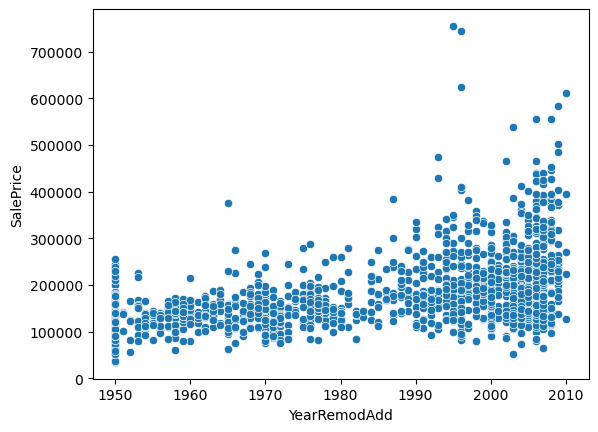

In [16]:
sns.scatterplot(data = df, x = 'YearRemodAdd', y = 'SalePrice')

In [18]:
df.corr(numeric_only=True)['SalePrice']['YearRemodAdd']

0.5071009671113866

YearRemodAdd has the same value as Year built if no remodeling was done on the home, so we'll convert it to a binary variable.

Also as seen above there seems to be a decent correlation between remodeling a home and Sale Price, especially if remodeling was done in recent years

In [56]:
#YearRemodAdd has the same value as Year built if no remodeling was done on the home, so we'll convert it to a binary variable.
#Also as seen above there seems to be a decent correlation between remodeling a home and Sale Price

df['remodel_binary'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)

<Axes: xlabel='remodel_binary', ylabel='SalePrice'>

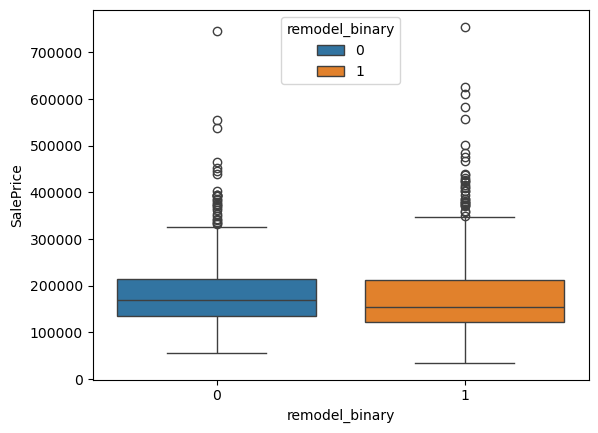

In [22]:
sns.boxplot(data = df, y = 'SalePrice', x = 'remodel_binary', hue = 'remodel_binary')

#### Remodeling doesn't seem to have a big effect on sale price but we'll keep it for now

In [57]:
df = df.drop('YearRemodAdd', axis = 1)

In [113]:
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Alley_binary,Fence_binary,1-1/2 STORY FINISHED ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_no_bsmt,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_no_bsmt,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_no_bsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_no_bsmt,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_no_bsmt,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_no_frplce,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_no_garage,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_no_garage,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_no_garage,GarageCond_Fa,GarageCond_Gd,Gara

## Preprocessing: Splitting and scaling data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

## Building the Model:

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping 

2024-08-14 09:17:49.980630: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
X_train.shape

(1088, 257)

In [29]:
model = Sequential()

#input layer corresponding to number of features:
model.add(Dense(units=257, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=125, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.35))

#Output layer:
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [30]:
#Incorporating Early stopping:
early_stop = EarlyStopping(patience=10, monitor = 'val_loss')

In [31]:
#Training model:

model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), epochs = 350, verbose=1, batch_size=64,
         callbacks = [early_stop])

Epoch 1/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 42451644416.0000 - val_loss: 36847874048.0000
Epoch 2/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39984824320.0000 - val_loss: 36806320128.0000
Epoch 3/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41317232640.0000 - val_loss: 36609257472.0000
Epoch 4/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37794775040.0000 - val_loss: 35971104768.0000
Epoch 5/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35920326656.0000 - val_loss: 34381144064.0000
Epoch 6/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34743771136.0000 - val_loss: 31162216448.0000
Epoch 7/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31288399872.0000 - val_loss: 25717686272.0000
Epoch 8/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27808964608.0000 - val_loss: 18195068928.0000
Epoch 9/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17301358592.0000 - val_loss: 10452265984.0000
Epoch 10/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2197876480.0000 - val_loss: 857625024.0000
Epoch 120/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2383819264.0000 - val_loss: 893950208.0000
Epoch 121/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2565177856.0000 - val_loss: 847245824.0000
Epoch 122/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2173282048.0000 - val_loss: 844070976.0000
Epoch 123/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2063266816.0000 - val_loss: 828743232.0000
Epoch 124/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2792424448.0000 - val_loss: 847272512.0000
Epoch 125/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2758733568.0000 - val_loss: 859256832.0000
Epoch 126/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2288716032.0000 - val_loss: 825854784.0000
Epoch 127/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2131316096.0000 - val_loss: 849217408.0000
Epoch 128/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2037921152.0000 -

In [32]:
ann_losses = pd.DataFrame(model.history.history)
ann_losses.head()

,loss,val_loss
0,3.959603e+10,3.684787e+10
1,3.957841e+10,3.680632e+10
2,3.947694e+10,3.660926e+10
3,3.909582e+10,3.597110e+10
4,3.801450e+10,3.438114e+10


<Axes: >

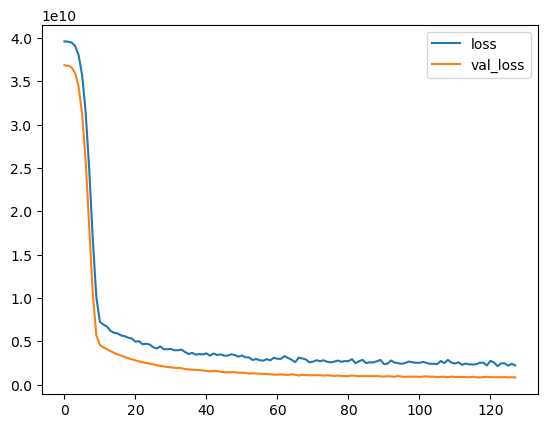

In [33]:
ann_losses.plot()

#### Validation loss was still decreasing so we will reinitialize model and train without early stopping:

In [34]:
#Incorporating model into a function to later be used with keras tuner for hyper-parameter optimization

def build_model():
    model = Sequential()
    
    #input layer corresponding to number of features:
    model.add(Dense(units=257, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=125, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(units=40, activation='relu'))
    model.add(Dropout(0.35))
    
    #Output layer:
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mse')

    return model

In [35]:
model = build_model()
model.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), epochs = 350, verbose=1, batch_size=64)

Epoch 1/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 38714138624.0000 - val_loss: 36847869952.0000
Epoch 2/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40032247808.0000 - val_loss: 36803227648.0000
Epoch 3/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38664904704.0000 - val_loss: 36597800960.0000
Epoch 4/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37975969792.0000 - val_loss: 35955585024.0000
Epoch 5/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38016176128.0000 - val_loss: 34414309376.0000
Epoch 6/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35917119488.0000 - val_loss: 31374534656.0000
Epoch 7/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33155534848.0000 - val_loss: 26296123392.0000
Epoch 8/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26885312512.0000 - val_loss: 19256012800.0000
Epoch 9/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22693314560.0000 - val_loss: 11709625344.0000
Epoch 10/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2931828480.0000 - val_loss: 961705408.0000
Epoch 120/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2570668800.0000 - val_loss: 825265600.0000
Epoch 121/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3245178880.0000 - val_loss: 901657664.0000
Epoch 122/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2472167424.0000 - val_loss: 906598336.0000
Epoch 123/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2543606016.0000 - val_loss: 889492928.0000
Epoch 124/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2652207104.0000 - val_loss: 866823936.0000
Epoch 125/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2783792384.0000 - val_loss: 891235264.0000
Epoch 126/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2742463744.0000 - val_loss: 842140416.0000
Epoch 127/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2615772672.0000 - val_loss: 816587392.0000
Epoch 128/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2643236352.00

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2024432256.0000 - val_loss: 725809472.0000
Epoch 238/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3036426752.0000 - val_loss: 711129152.0000
Epoch 239/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2590729984.0000 - val_loss: 725016384.0000
Epoch 240/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2253695744.0000 - val_loss: 741730368.0000
Epoch 241/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2749551104.0000 - val_loss: 746000640.0000
Epoch 242/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2272342784.0000 - val_loss: 802606592.0000
Epoch 243/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2348967424.0000 - val_loss: 735998848.0000
Epoch 244/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2234550016.0000 - val_loss: 709173824.0000
Epoch 245/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2468259072.0000 - val_loss: 804652288.0000
Epoch 246/350
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2402477824.0000 -

In [36]:
ann_losses = pd.DataFrame(model.history.history)
ann_losses.head()

,loss,val_loss
0,3.959599e+10,3.684787e+10
1,3.957751e+10,3.680323e+10
2,3.946985e+10,3.659780e+10
3,3.907650e+10,3.595559e+10
4,3.803821e+10,3.441431e+10


<Axes: >

<Figure size 1000x600 with 0 Axes>

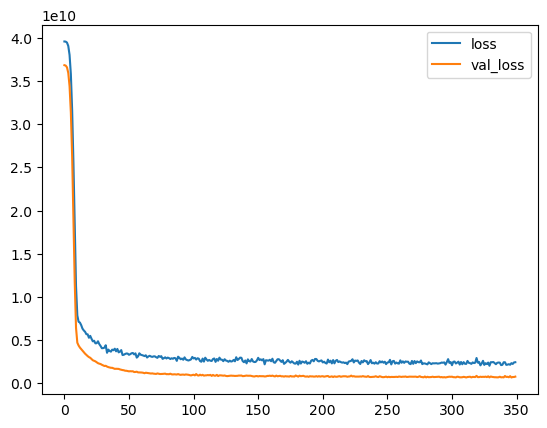

In [37]:
plt.figure(figsize=(10,6))
ann_losses.plot()

In [38]:
#Evaluating model:

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [39]:
predictions = model.predict(X_test)
ann_rmse = np.sqrt(mean_squared_error(y_test,predictions))
print(ann_rmse)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
27508.903807649913


In [40]:
#Error as percentage of average sale price in the data:
ann_percentage_error = ann_rmse / df['SalePrice'].mean()
print(round(ann_percentage_error * 100, 2))

15.23


# Keras tuner:
Using this tuner we will automatically test many different model architectures, with varying number of layers, units per layer, and
dropout rates to optimize network structure and try to beat the RandomForest model to see if a more complex model will help with making better predictions

In [16]:
from kerastuner.engine.hyperparameters import HyperParameters
import keras_tuner

/var/folders/18/_q0z_1k55hb814fgjk4yb8pc0000gn/T/ipykernel_22935/3722330828.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine.hyperparameters import HyperParameters


In [51]:
def build_model(hp): #Passing in hyper-parameter object
    model = Sequential()
    
    #making number of neurons in input layer dynamic for tuner to then test them:
    model.add(Dense(units= hp.Int('input_units', min_value = 100, max_value = 300, step =  40), activation='relu'))
    model.add(Dropout(0.2))

    #Loop to allow tuner to try different numbers of layers:
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units= hp.Int(f'input_units_layer_{i}', min_value = 100, max_value = 300, step =  40), activation='relu'))
        model.add(Dropout(hp.Float('Dropout_rate', min_value = 0.1, max_value = 0.6, step =  0.1))) #Testing different dropout rates
    
    #Output layer:
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mse')

    return model

ann_tuner = RandomSearch(hypermodel=build_model, objective='val_mse', max_trials=10, executions_per_trial= 10)


ann_tuner.search(x = X_train, y = y_train, epochs = 250, batch_size = 64, validation_data = (X_test, y_test))

Trial 2 Complete [00h 05m 47s]

Best val_mse So Far: None
Total elapsed time: 00h 12m 34s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
140               |100               |input_units
2                 |2                 |num_layers
300               |140               |input_units_layer_0
0.4               |0.4               |Dropout_rate
180               |100               |input_units_layer_1

Epoch 1/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 39346982912.0000 - val_loss: 36833878016.0000
Epoch 2/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38740799488.0000 - val_loss: 36607680512.0000
Epoch 3/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38765297664.0000 - val_loss: 35357401088.0000
Epoch 4/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37312950272.0000 - val_loss: 31080566784.0000
Epoch 5/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32202065920.0000 - val_loss: 21265696768.0000
Epoch 6/250
17/17 ━━━━━━━━━━━━━━━━━━━

Epoch 117/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1175212032.0000 - val_loss: 656767936.0000
Epoch 118/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1058557568.0000 - val_loss: 683800384.0000
Epoch 119/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1146351232.0000 - val_loss: 656866880.0000
Epoch 120/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1119422592.0000 - val_loss: 658297408.0000
Epoch 121/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1053428352.0000 - val_loss: 650028544.0000
Epoch 122/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1041199616.0000 - val_loss: 654174784.0000
Epoch 123/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1082248192.0000 - val_loss: 654775936.0000
Epoch 124/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1041500544.0000 - val_loss: 646350720.0000
Epoch 125/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1199885440.0000 - val_loss: 650216768.0000
Epoch 126/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 867612928.0000 - val_loss: 628365504.0000
Epoch 236/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 876983040.0000 - val_loss: 629925120.0000
Epoch 237/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 825883968.0000 - val_loss: 641520192.0000
Epoch 238/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1061312896.0000 - val_loss: 650552448.0000
Epoch 239/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 898794240.0000 - val_loss: 622382784.0000
Epoch 240/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 873686720.0000 - val_loss: 643409536.0000
Epoch 241/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 854356224.0000 - val_loss: 627807232.0000
Epoch 242/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 878963520.0000 - val_loss: 661869184.0000
Epoch 243/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 863662208.0000 - val_loss: 621535872.0000
Epoch 244/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 927860288.0000 - val_loss

Epoch 104/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1540462720.0000 - val_loss: 713087168.0000
Epoch 105/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1468371584.0000 - val_loss: 704336320.0000
Epoch 106/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1342399104.0000 - val_loss: 703471616.0000
Epoch 107/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1244432128.0000 - val_loss: 713022656.0000
Epoch 108/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1529026176.0000 - val_loss: 703544960.0000
Epoch 109/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1247079552.0000 - val_loss: 702077888.0000
Epoch 110/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1173820160.0000 - val_loss: 709478464.0000
Epoch 111/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1512339328.0000 - val_loss: 694192448.0000
Epoch 112/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1058237824.0000 - val_loss: 711793216.0000
Epoch 113/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 111

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1257937408.0000 - val_loss: 677359296.0000
Epoch 223/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 894635968.0000 - val_loss: 656510144.0000
Epoch 224/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 994463424.0000 - val_loss: 636505408.0000
Epoch 225/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 877904192.0000 - val_loss: 639373952.0000
Epoch 226/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 951723200.0000 - val_loss: 645020544.0000
Epoch 227/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1013049664.0000 - val_loss: 654152384.0000
Epoch 228/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1091059072.0000 - val_loss: 638821760.0000
Epoch 229/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 998634752.0000 - val_loss: 644861248.0000
Epoch 230/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 941681536.0000 - val_loss: 644682624.0000
Epoch 231/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1036420992.0000 - val_l

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1129497728.0000 - val_loss: 746905344.0000
Epoch 91/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1243336576.0000 - val_loss: 715620480.0000
Epoch 92/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1327144192.0000 - val_loss: 716843968.0000
Epoch 93/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1150538624.0000 - val_loss: 747350208.0000
Epoch 94/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1205212032.0000 - val_loss: 717252800.0000
Epoch 95/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1167976192.0000 - val_loss: 715354176.0000
Epoch 96/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1157003904.0000 - val_loss: 706569600.0000
Epoch 97/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1180765056.0000 - val_loss: 728166336.0000
Epoch 98/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1097324032.0000 - val_loss: 700440896.0000
Epoch 99/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1257657344.0000 - val_loss

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1000761280.0000 - val_loss: 624978816.0000
Epoch 209/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 923057536.0000 - val_loss: 617276480.0000
Epoch 210/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1195954944.0000 - val_loss: 622449472.0000
Epoch 211/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1255140480.0000 - val_loss: 673781568.0000
Epoch 212/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1087676800.0000 - val_loss: 629876544.0000
Epoch 213/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1003310016.0000 - val_loss: 635385664.0000
Epoch 214/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 890787136.0000 - val_loss: 628683840.0000
Epoch 215/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1122048640.0000 - val_loss: 668908608.0000
Epoch 216/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1005729664.0000 - val_loss: 629133120.0000
Epoch 217/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 953698624.0000 - v

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1664809472.0000 - val_loss: 795200000.0000
Epoch 77/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1555023232.0000 - val_loss: 753227520.0000
Epoch 78/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1240183296.0000 - val_loss: 755392832.0000
Epoch 79/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1189534720.0000 - val_loss: 747230976.0000
Epoch 80/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1223939584.0000 - val_loss: 749662272.0000
Epoch 81/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1472864000.0000 - val_loss: 771789696.0000
Epoch 82/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1480706560.0000 - val_loss: 742489664.0000
Epoch 83/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1319854464.0000 - val_loss: 745207104.0000
Epoch 84/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1126422272.0000 - val_loss: 734599168.0000
Epoch 85/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1158278912.0000 - val_loss

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1230199552.0000 - val_loss: 660813760.0000
Epoch 195/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1021080832.0000 - val_loss: 635979264.0000
Epoch 196/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 893652352.0000 - val_loss: 677640064.0000
Epoch 197/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 971665152.0000 - val_loss: 633927360.0000
Epoch 198/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 912843008.0000 - val_loss: 683319680.0000
Epoch 199/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1012648128.0000 - val_loss: 644336448.0000
Epoch 200/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 893561856.0000 - val_loss: 659594496.0000
Epoch 201/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1089113856.0000 - val_loss: 641959424.0000
Epoch 202/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1011805440.0000 - val_loss: 650629440.0000
Epoch 203/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1315455872.0000 - val

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1357526144.0000 - val_loss: 813820800.0000
Epoch 63/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1614850816.0000 - val_loss: 824200768.0000
Epoch 64/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1270918144.0000 - val_loss: 799557952.0000
Epoch 65/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1526555904.0000 - val_loss: 796385344.0000
Epoch 66/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1136856576.0000 - val_loss: 797163584.0000
Epoch 67/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1426687616.0000 - val_loss: 805829056.0000
Epoch 68/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1307368320.0000 - val_loss: 787844288.0000
Epoch 69/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1103185024.0000 - val_loss: 809172352.0000
Epoch 70/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1577929472.0000 - val_loss: 783347904.0000
Epoch 71/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1358652416.0000 - val_loss

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1021671296.0000 - val_loss: 633579200.0000
Epoch 181/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1162628608.0000 - val_loss: 698246272.0000
Epoch 182/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1203176960.0000 - val_loss: 628511360.0000
Epoch 183/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1069619776.0000 - val_loss: 628698240.0000
Epoch 184/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1016137152.0000 - val_loss: 645677760.0000
Epoch 185/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 973182080.0000 - val_loss: 628862912.0000
Epoch 186/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1051295040.0000 - val_loss: 631730048.0000
Epoch 187/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1014553664.0000 - val_loss: 631488576.0000
Epoch 188/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1024410240.0000 - val_loss: 643622272.0000
Epoch 189/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1042014656.0000 - 

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1733678336.0000 - val_loss: 949343552.0000
Epoch 49/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1858538368.0000 - val_loss: 916755776.0000
Epoch 50/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1874011264.0000 - val_loss: 925471424.0000
Epoch 51/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2133821056.0000 - val_loss: 907497216.0000
Epoch 52/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1485582848.0000 - val_loss: 892848832.0000
Epoch 53/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1552303232.0000 - val_loss: 880384448.0000
Epoch 54/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1327641216.0000 - val_loss: 872846976.0000
Epoch 55/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1793224960.0000 - val_loss: 866613952.0000
Epoch 56/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1388667264.0000 - val_loss: 858256576.0000
Epoch 57/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1574195072.0000 - val_loss

Epoch 108/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1332219392.0000 - val_loss: 679237056.0000
Epoch 109/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1173838464.0000 - val_loss: 669572800.0000
Epoch 110/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1237787392.0000 - val_loss: 682547264.0000
Epoch 111/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 979514240.0000 - val_loss: 676099392.0000
Epoch 112/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1234091008.0000 - val_loss: 665120192.0000
Epoch 113/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1232965632.0000 - val_loss: 680363392.0000
Epoch 114/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1320981760.0000 - val_loss: 720482496.0000
Epoch 115/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1264056320.0000 - val_loss: 668612352.0000
Epoch 116/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1060630080.0000 - val_loss: 663981312.0000
Epoch 117/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1156

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1005972672.0000 - val_loss: 650472960.0000
Epoch 227/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 884571648.0000 - val_loss: 616623808.0000
Epoch 228/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 850114176.0000 - val_loss: 628723840.0000
Epoch 229/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1005382272.0000 - val_loss: 639155904.0000
Epoch 230/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 874664512.0000 - val_loss: 623806208.0000
Epoch 231/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 955544192.0000 - val_loss: 626646080.0000
Epoch 232/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1072528832.0000 - val_loss: 623440768.0000
Epoch 233/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 929719296.0000 - val_loss: 627791872.0000
Epoch 234/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1000345920.0000 - val_loss: 647391360.0000
Epoch 235/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 829606720.0000 - val_

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1026165760.0000 - val_loss: 717107712.0000
Epoch 95/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1310133248.0000 - val_loss: 709894016.0000
Epoch 96/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1238547584.0000 - val_loss: 715113152.0000
Epoch 97/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1261406720.0000 - val_loss: 698133952.0000
Epoch 98/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1079708160.0000 - val_loss: 698335936.0000
Epoch 99/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1476639488.0000 - val_loss: 739849600.0000
Epoch 100/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1258257920.0000 - val_loss: 700620864.0000
Epoch 101/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1197547136.0000 - val_loss: 695347008.0000
Epoch 102/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1198216192.0000 - val_loss: 683614976.0000
Epoch 103/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1001659456.0000 -

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1000982144.0000 - val_loss: 673273920.0000
Epoch 213/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 956908608.0000 - val_loss: 641171264.0000
Epoch 214/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1171437312.0000 - val_loss: 627952448.0000
Epoch 215/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 740862016.0000 - val_loss: 626213696.0000
Epoch 216/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 868940672.0000 - val_loss: 642625600.0000
Epoch 217/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 906106496.0000 - val_loss: 645911296.0000
Epoch 218/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1187808896.0000 - val_loss: 626068736.0000
Epoch 219/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1084519680.0000 - val_loss: 621455040.0000
Epoch 220/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 898598720.0000 - val_loss: 668612608.0000
Epoch 221/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 948470464.0000 - val_l

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1241442048.0000 - val_loss: 724483776.0000
Epoch 81/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1383023744.0000 - val_loss: 754349696.0000
Epoch 82/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1358322688.0000 - val_loss: 732293760.0000
Epoch 83/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1091759360.0000 - val_loss: 726611968.0000
Epoch 84/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1527606272.0000 - val_loss: 730436288.0000
Epoch 85/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1262127872.0000 - val_loss: 719894336.0000
Epoch 86/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1552434048.0000 - val_loss: 723607168.0000
Epoch 87/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1373833728.0000 - val_loss: 713751616.0000
Epoch 88/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1175767040.0000 - val_loss: 714114752.0000
Epoch 89/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1056803008.0000 - val_loss

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1170353280.0000 - val_loss: 626310784.0000
Epoch 199/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 874646656.0000 - val_loss: 618438400.0000
Epoch 200/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1036054784.0000 - val_loss: 634098048.0000
Epoch 201/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1065443072.0000 - val_loss: 615952320.0000
Epoch 202/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 929765888.0000 - val_loss: 646366784.0000
Epoch 203/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 845832128.0000 - val_loss: 618083648.0000
Epoch 204/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 862883712.0000 - val_loss: 628770496.0000
Epoch 205/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 818006912.0000 - val_loss: 635801984.0000
Epoch 206/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1025134400.0000 - val_loss: 627480320.0000
Epoch 207/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 924504320.0000 - val_l

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1587527296.0000 - val_loss: 830860160.0000
Epoch 67/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1628422144.0000 - val_loss: 816426880.0000
Epoch 68/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1565743616.0000 - val_loss: 827517504.0000
Epoch 69/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1524735232.0000 - val_loss: 812109952.0000
Epoch 70/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1456909184.0000 - val_loss: 812039232.0000
Epoch 71/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1370988544.0000 - val_loss: 805704832.0000
Epoch 72/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1372188672.0000 - val_loss: 804531520.0000
Epoch 73/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1240502400.0000 - val_loss: 785424064.0000
Epoch 74/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1339870080.0000 - val_loss: 807748544.0000
Epoch 75/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1997220352.0000 - val_los

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 963635392.0000 - val_loss: 635513664.0000
Epoch 185/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1165041280.0000 - val_loss: 636356800.0000
Epoch 186/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1054236736.0000 - val_loss: 632731456.0000
Epoch 187/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1001734464.0000 - val_loss: 636643136.0000
Epoch 188/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1119938944.0000 - val_loss: 649292032.0000
Epoch 189/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1263657472.0000 - val_loss: 631784960.0000
Epoch 190/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1109820416.0000 - val_loss: 646411968.0000
Epoch 191/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 997073280.0000 - val_loss: 648323200.0000
Epoch 192/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 975554368.0000 - val_loss: 638945152.0000
Epoch 193/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 927785344.0000 - val

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2277817856.0000 - val_loss: 903978240.0000
Epoch 53/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1721593728.0000 - val_loss: 857186048.0000
Epoch 54/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1543398528.0000 - val_loss: 855253568.0000
Epoch 55/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1638388608.0000 - val_loss: 849221184.0000
Epoch 56/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1599857152.0000 - val_loss: 842759360.0000
Epoch 57/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1724975360.0000 - val_loss: 853779968.0000
Epoch 58/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1310225664.0000 - val_loss: 824912128.0000
Epoch 59/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1636500096.0000 - val_loss: 825684800.0000
Epoch 60/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1784784128.0000 - val_loss: 812087616.0000
Epoch 61/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1328997760.0000 - val_lo

Epoch 112/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1076593280.0000 - val_loss: 682401408.0000
Epoch 113/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 878805504.0000 - val_loss: 670635200.0000
Epoch 114/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1414423424.0000 - val_loss: 695352896.0000
Epoch 115/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 998792512.0000 - val_loss: 658378560.0000
Epoch 116/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 967007872.0000 - val_loss: 676084352.0000
Epoch 117/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1257896320.0000 - val_loss: 719286336.0000
Epoch 118/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1081457536.0000 - val_loss: 663920512.0000
Epoch 119/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1361114880.0000 - val_loss: 709232576.0000
Epoch 120/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1094580864.0000 - val_loss: 657148992.0000
Epoch 121/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 117709

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1094863872.0000 - val_loss: 625013760.0000
Epoch 231/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 983153088.0000 - val_loss: 624438272.0000
Epoch 232/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 942103168.0000 - val_loss: 623307584.0000
Epoch 233/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 772452928.0000 - val_loss: 631522304.0000
Epoch 234/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 877369984.0000 - val_loss: 624776768.0000
Epoch 235/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 790102976.0000 - val_loss: 626904384.0000
Epoch 236/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 799603904.0000 - val_loss: 637581312.0000
Epoch 237/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 890398720.0000 - val_loss: 624060992.0000
Epoch 238/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 935720192.0000 - val_loss: 627385856.0000
Epoch 239/250
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 865302400.0000 - val_loss

Traceback (most recent call last):
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/base_tuner.py", line 265, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in <listcomp>
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/tuner_utils.py",

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/base_tuner.py", line 265, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in <listcomp>
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/tuner_utils.py", line 145, in convert_to_metrics_dict
    best_value, _ = _get_best_value_and_best_epoch_from_history(
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/tuner_utils.py", line 116, in _get_best_value_and_best_epoch_from_history
    objective_value = objective.get_value(metrics)
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/objective.py", line 59, in get_value
    return logs[self.name]
KeyError: 'val_mse'


In [55]:
print(ann_tuner.results_summary())

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_mse", direction="min")

Trial 00 summary
Hyperparameters:
input_units: 100
num_layers: 2
input_units_layer_0: 140
Dropout_rate: 0.4
input_units_layer_1: 100
Traceback (most recent call last):
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/base_tuner.py", line 265, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/keras_tuner/src/engine/tuner_utils.py", line 132, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/Users/julesbellosguardo/anaconda3/envs/TF/lib/python3.9/site-packages/ker

In [54]:
#Best combination of hyperparameters:

print(ann_tuner.get_best_hyperparameters()[0].values)

{'input_units': 100, 'num_layers': 2, 'input_units_layer_0': 140, 'Dropout_rate': 0.4, 'input_units_layer_1': 100}


In [58]:
print(ann_tuner.get_best_models()[0].summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (64, 100)              │        25,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (64, 100)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 140)              │        14,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (64, 140)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 100)              │        14,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (64, 100)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (64, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,141 (211.49 KB)

 Trainable params: 54,141 (211.49 KB)

 Non-trainable params: 0 (0.00 B)

None


In [60]:
#Making predictions with our best model:

tuned_ann_preds = ann_tuner.get_best_models()[0].predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [62]:
np.sqrt(mean_squared_error(y_test,tuned_ann_preds))

26280.267571607055

#### This is the best performance so far on predicting house prices, though not by a huge amount. The added compexity of an ANN seems to give it a slight edge over random forests with this data